# Visulaizing Naive Bayes 

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
from utils import confidence_ellipse


Calculating the likelihood of each tweet

In [2]:
data = pd.read_csv('../data/bayes_features.csv')
data.head(5)

,positive,negative,sentiment
0,-45.763393,-63.351354,1.0
1,-105.491568,-114.204862,1.0
2,-57.028078,-67.216467,1.0
3,-10.055885,-18.589057,1.0
4,-125.749270,-138.334845,1.0


In [3]:
index = data.index
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    

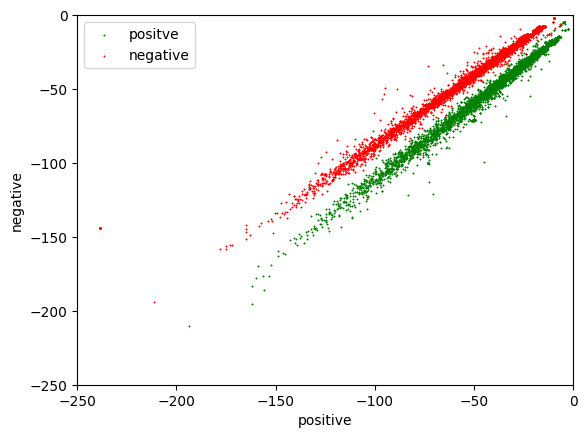

In [4]:
fig, ax = plt.subplots(figure=(8,8))

colors = ['red', 'green']
sentiments = ['negative','positve']

index = data.index

# Color base on sentiment 
for sentiment in data.sentiment.unique():
    ix = index[data.sentiment == sentiment]
    ax.scatter(data.iloc[ix].positive, data.iloc[ix].negative, c= colors[int(sentiment)], s= 0.1, marker='*', label= sentiments[int(sentiment)])

ax.legend(loc='best')

plt.xlim(-250,0)
plt.ylim(-250,0)

plt.xlabel('positive') # x-axis label 
plt.ylabel('negative') # y-axis label
plt.show()



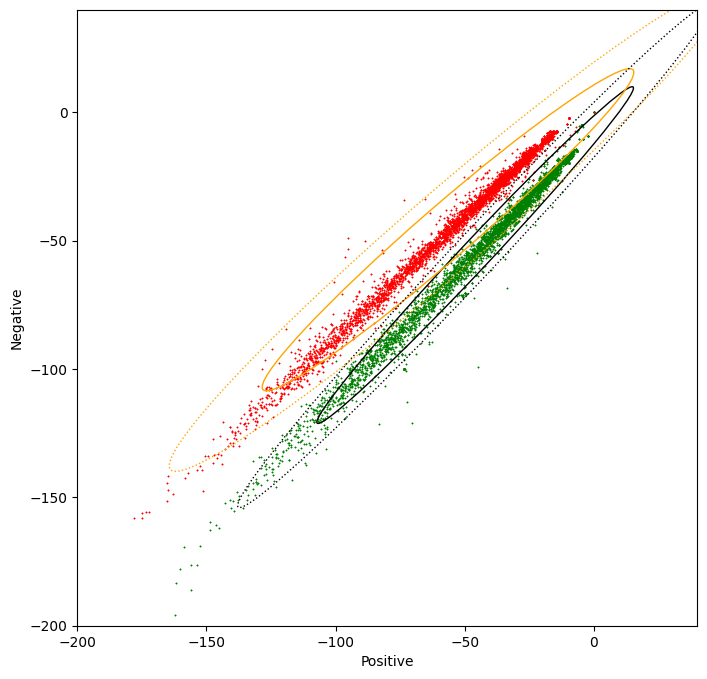

In [10]:
fig, ax = plt.subplots(figsize=(8,8))

colors = ['red','green']
sentiments = ['negative','positive']
index = data.index

# color base on segemntation 
for sentiment in data.sentiment.unique():
    idx = index[data.sentiment==sentiment]
    ax.scatter(data.iloc[idx].positive,data.iloc[idx].negative,c=colors[int(sentiment)], s=0.1, marker='*',label = sentiments[int(sentiment)])

# custom limits for this chart 
plt.xlim(-200,40)
plt.ylim(-200,40)

plt.xlabel("Positive")
plt.ylabel("Negative")

data_pos = data[data.sentiment ==1]
data_neg = data[data.sentiment ==0]

# print confidence ellipse of 2 std 
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std= 2, edgecolor='black', label = r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std = 2, edgecolor ='orange')

# print confidence ellipse of 3 std 
confidence_ellipse(data_pos.positive,data_pos.negative, ax, n_std = 3, edgecolor= 'black', linestyle=':', label = r'$3\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax, n_std=3, edgecolor = 'orange', linestyle=":")

plt.show()

In [19]:
data2 = data.copy()

data2.negative[data.sentiment ==1 ] = data2.negative * 1.5 + 50 
data2.positive[data.sentiment ==1] = data2.positive /1.5 - 50 



C:\Users\ishan\AppData\Local\Temp\ipykernel_8824\2769533860.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data2.negative[data.sentiment ==1 ] = data2.negative * 1.5 + 50
C:\Users\ishan\AppData\Local\Temp\ipykernel_8824\2769533860.py:4:

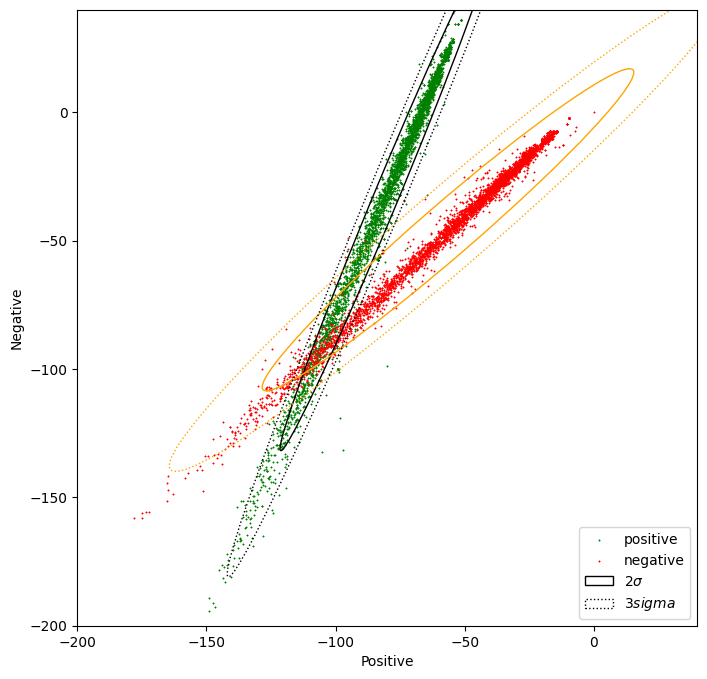

In [20]:
# Plot the samples using columns 1 and 2 of the matrix
fig, ax = plt.subplots(figsize = (8, 8))

colors = ['red', 'green'] # Define a color palete
sentiments = ['negative', 'positive'] 
index = data2.index
# color base on sentiment
for sentiment in data.sentiment.unique():
    ix = index[data2.sentiment == sentiment]
    ax.scatter(data2.iloc[ix].positive, data2.iloc[ix].negative, c= colors[int(sentiment)], s= 0.1, marker ='*', label = sentiments[int(sentiment)])

#custome limits for this chart 
plt.xlim(-200, 40)
plt.ylim(-200, 40)

plt.xlabel('Positive') # x -axis label 
plt.ylabel('Negative') # y-axis label 

data_pos = data2[data2.sentiment ==1]
data_neg = data[data2.sentiment ==0]

#print confidence ellipse of 2 std 

confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std= 2, edgecolor= 'black', label = r'$2\sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax , n_std=2, edgecolor = 'orange')
                   
# Print confidence ellipse of 3 std
confidence_ellipse(data_pos.positive, data_pos.negative, ax, n_std = 3, edgecolor =  'black', linestyle = ':', label = r'$3sigma$')
confidence_ellipse(data_neg.positive, data_neg.negative, ax , n_std=3 , edgecolor='orange', linestyle =':')

ax.legend(loc='lower right')
plt.show()